In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [ ]:

url = "https://fbref.com/en/comps/9/Premier-League-Stats"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')


In [ ]:

teams_data = []


table = soup.find('table')


for row in table.find('tbody').find_all('tr'):
    cols = row.find_all('td')
    
    # Extract the desired stats for each team
    team_name = cols[0].text.strip()
    mp = int(cols[1].text.strip())           # Matches Played
    w = int(cols[2].text.strip())             # Wins
    d = int(cols[3].text.strip())             # Draws
    l = int(cols[4].text.strip())             # Losses
    gf = int(cols[5].text.strip())            # Goals For
    ga = int(cols[6].text.strip())            # Goals Against
    gd = int(cols[7].text.strip())            # Goal Difference
    pts = int(cols[8].text.strip())           # Points
    pts_mp = float(cols[9].text.strip())      # Points per Match
    xg = float(cols[10].text.strip())         # Expected Goals
    xga = float(cols[11].text.strip())        # Expected Goals Against
    xgd = float(cols[12].text.strip())        # Expected Goal Difference
    xgd_90 = float(cols[13].text.strip())     # Expected Goal Difference per 90
    top_scorer = cols[16].text.strip()        # Top Team Scorer

    # Append team data to the list
    teams_data.append({
        'team_name': team_name,
        'MP': mp,
        'W': w,
        'D': d,
        'L': l,
        'GF': gf,
        'GA': ga,
        'GD': gd,
        'Pts': pts,
        'Pts/MP': pts_mp,
        'xG': xg,
        'xGA': xga,
        'xGD': xgd,
        'xGD/90': xgd_90,
        'Top_Team_Scorer': top_scorer
    })

teams_df = pd.DataFrame(teams_data)


print(teams_df)



          team_name  MP  W  D  L  GF  GA  GD  Pts  Pts/MP    xG   xGA   xGD  \
0   Manchester City   9  7  2  0  20   9  11   23    2.56  18.3   8.7   9.6   
1         Liverpool   9  7  1  1  17   5  12   22    2.44  16.5   7.0   9.4   
2           Arsenal   9  5  3  1  17  10   7   18    2.00  14.4   9.9   4.6   
3       Aston Villa   9  5  3  1  16  11   5   18    2.00  13.2   8.8   4.3   
4           Chelsea   9  5  2  2  19  11   8   17    1.89  17.0  11.5   5.4   
5          Brighton   9  4  4  1  16  12   4   16    1.78  13.1  14.6  -1.5   
6   Nott'ham Forest   9  4  4  1  11   7   4   16    1.78  11.4   9.4   2.0   
7         Tottenham   9  4  1  4  18  10   8   13    1.44  17.4   9.6   7.8   
8         Brentford   9  4  1  4  18  18   0   13    1.44  16.1  15.4   0.7   
9            Fulham   9  3  3  3  12  12   0   12    1.33  13.8  10.5   3.3   
10      Bournemouth   9  3  3  3  11  11   0   12    1.33  14.2  11.4   2.8   
11    Newcastle Utd   9  3  3  3   9  10  -1   12   

In [ ]:
import pandas as pd


teams_df = pd.read_csv('premier_league_stats.csv')

# Descriptive statistics
print("Descriptive Statistics:")
print(teams_df.describe())

# League-wide averages
league_averages = teams_df.mean(numeric_only=True)
print("\nLeague-Wide Averages:")
print(league_averages)

# Correlation matrix
correlation_matrix = teams_df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)



Descriptive Statistics:
         MP          W     D          L         GF         GA         GD  \
count  20.0  20.000000  20.0  20.000000  20.000000  20.000000  20.000000   
mean    9.0   3.250000   2.5   3.250000  13.050000  13.050000   0.000000   
std     0.0   2.048748   1.0   2.099499   4.346505   4.882568   7.448066   
min     9.0   0.000000   1.0   0.000000   6.000000   5.000000 -13.000000   
25%     9.0   2.000000   2.0   1.000000   9.750000  10.000000  -4.250000   
50%     9.0   3.000000   3.0   3.500000  12.500000  11.000000   0.000000   
75%     9.0   4.250000   3.0   4.000000  17.000000  16.250000   5.500000   
max     9.0   7.000000   4.0   8.000000  20.000000  25.000000  12.000000   

             Pts     Pts/MP         xG        xGA        xGD     xGD/90  
count  20.000000  20.000000  20.000000  20.000000  20.000000  20.000000  
mean   12.250000   1.360000  13.150000  13.145000  -0.005000   0.001500  
std     6.033895   0.671126   3.175482   3.886613   6.459467   0.7179

C:\Users\nabil\AppData\Local\Temp\ipykernel_29140\3079966861.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = teams_df.corr()


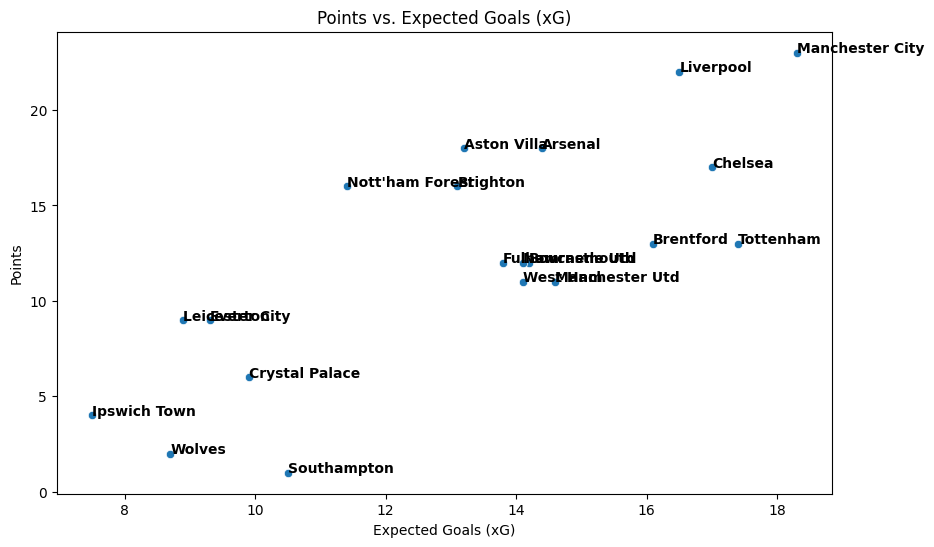

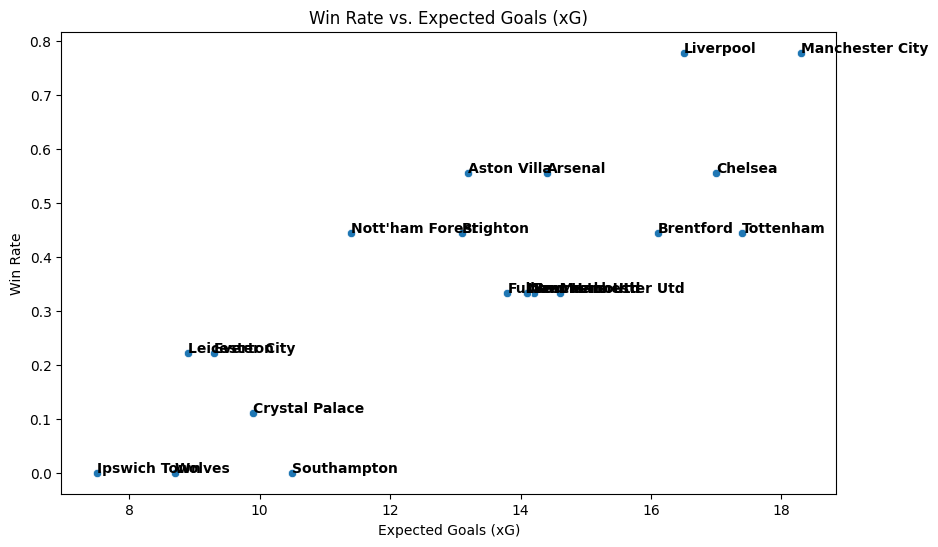

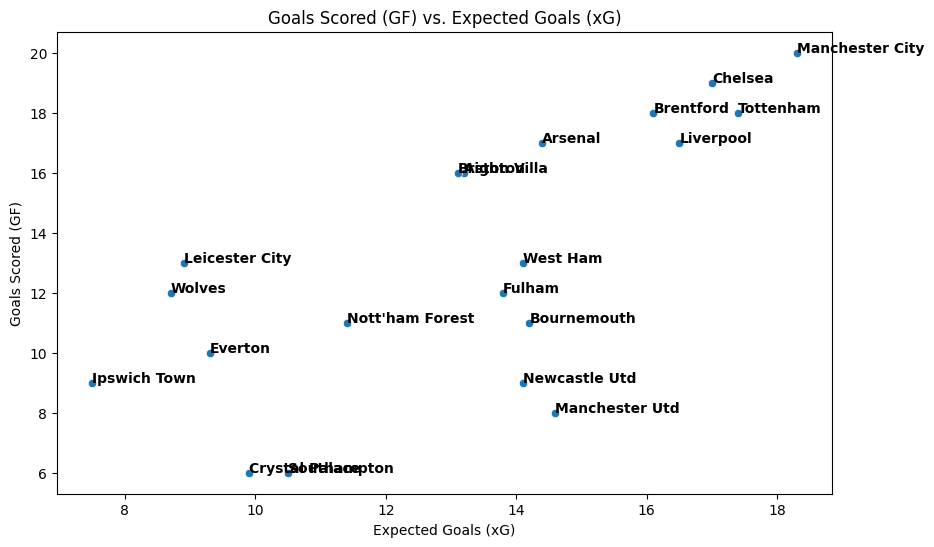

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Points vs. xG Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='xG', y='Pts', data=teams_df)

# Adding team names to the plot
for i in range(teams_df.shape[0]):
    plt.text(teams_df['xG'].iloc[i], teams_df['Pts'].iloc[i], teams_df['team_name'].iloc[i], 
             horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title("Points vs. Expected Goals (xG)")
plt.xlabel("Expected Goals (xG)")
plt.ylabel("Points")
plt.show()

# Win Rate vs. Expected Goals
teams_df['Win_Rate'] = teams_df['W'] / teams_df['MP']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='xG', y='Win_Rate', data=teams_df)

# Adding team names to the plot
for i in range(teams_df.shape[0]):
    plt.text(teams_df['xG'].iloc[i], teams_df['Win_Rate'].iloc[i], teams_df['team_name'].iloc[i], 
             horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title("Win Rate vs. Expected Goals (xG)")
plt.xlabel("Expected Goals (xG)")
plt.ylabel("Win Rate")
plt.show()

# Compare GF vs xG
plt.figure(figsize=(10, 6))
sns.scatterplot(x='xG', y='GF', data=teams_df)

# Adding team names to the plot
for i in range(teams_df.shape[0]):
    plt.text(teams_df['xG'].iloc[i], teams_df['GF'].iloc[i], teams_df['team_name'].iloc[i], 
             horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title("Goals Scored (GF) vs. Expected Goals (xG)")
plt.xlabel("Expected Goals (xG)")
plt.ylabel("Goals Scored (GF)")
plt.show()


In [ ]:
# 1. Extract top scorer names and goals

teams_df[['Top_Scorer_Name', 'Top_Scorer_Goals']] = teams_df['Top_Team_Scorer'].str.split(' - ', expand=True)
teams_df['Top_Scorer_Goals'] = teams_df['Top_Scorer_Goals'].astype(int)  # Convert goals to integer

# 2. Calculate total goals scored by each team

# 3. Calculate the percentage of goals scored by the top scorer
teams_df['Goal_Percentage'] = (teams_df['Top_Scorer_Goals'] / teams_df['GF']) * 100

# 4. Get the top 5 team scorers
top_5_scorers = teams_df.nlargest(5, 'Top_Scorer_Goals')[['Top_Scorer_Name', 'team_name', 'Top_Scorer_Goals', 'GF', 'Goal_Percentage']]


print(top_5_scorers)

  Top_Scorer_Name        team_name  Top_Scorer_Goals  GF  Goal_Percentage
0  Erling Haaland  Manchester City                11  20        55.000000
8    Bryan Mbeumo        Brentford                 8  18        44.444444
4     Cole Palmer          Chelsea                 7  19        36.842105
6      Chris Wood  Nott'ham Forest                 7  11        63.636364
1   Mohamed Salah        Liverpool                 6  17        35.294118


In [49]:
# Total number of matches in the Premier League
total_matches = 38

# Calculate remaining matches for each team
teams_df['Remaining_Matches'] = total_matches - teams_df['MP']

# Predict future points based on current Pts/MP
teams_df['Predicted_Future_Points'] = teams_df['Remaining_Matches'] * teams_df['Pts/MP']

# Calculate total predicted points
teams_df['Total_Predicted_Points'] = teams_df['Pts'] + teams_df['Predicted_Future_Points']

# Sort teams based on predicted total points
predicted_standings = teams_df.sort_values(by='Total_Predicted_Points', ascending=False)

# Get the top 4 and bottom 3 teams
top_4_predicted = predicted_standings[['team_name', 'Total_Predicted_Points']].head(4)
bottom_3_predicted = predicted_standings[['team_name', 'Total_Predicted_Points']].tail(3)

# Display the results
print("Predicted Top 4 Teams After Remaining 29 Games:")
print(top_4_predicted)

print("\nPredicted Bottom 3 Teams After Remaining 29 Games:")
print(bottom_3_predicted)


Predicted Top 4 Teams After Remaining 29 Games:
         team_name  Total_Predicted_Points
0  Manchester City                   97.24
1        Liverpool                   92.76
2          Arsenal                   76.00
3      Aston Villa                   76.00

Predicted Bottom 3 Teams After Remaining 29 Games:
       team_name  Total_Predicted_Points
17  Ipswich Town                   16.76
18        Wolves                    8.38
19   Southampton                    4.19
